In [13]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns',None)

In [6]:
df = pd.read_csv('processed_data_Ideaspice.csv')

In [14]:
df.head()

,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Turnover,Qualifications,Satisfaction,Engagement,Level,Daily,Hour,Monthly,MonthlyRate,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0,2,2,2,3,7,1,40,0,3,4,2,2,129,97,6287,4984,1,23,4,1,3,1,1,1,1,2
1,1,1,1,2,2,7,0,46,0,4,4,3,2,134,64,4866,24079,9,18,3,2,3,8,7,7,7,23
2,0,2,2,1,3,5,1,49,0,3,4,3,4,934,82,19833,25706,5,14,3,2,4,5,5,0,5,13
3,1,1,2,1,1,0,0,29,0,5,4,3,3,1201,32,7854,3642,1,19,3,3,2,1,1,1,1,13
4,0,1,2,1,3,5,0,54,0,3,1,1,4,1478,42,18731,13254,2,13,3,3,3,2,2,0,1,1


In [10]:
df.drop(columns='Unnamed: 0',inplace=True)

### selecting feature for scaling 

In [12]:
feature_scale = [feature for feature in df.columns if feature not in ['Turnover']]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(df[feature_scale])

MinMaxScaler()

In [16]:
# transform 
df = pd.concat([df[['Turnover']].reset_index(drop=True),
                    pd.DataFrame(scale.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [17]:
df.head()

,Turnover,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Qualifications,Satisfaction,Engagement,Level,Daily,Hour,Monthly,MonthlyRate,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0,0.0,1.0,1.0,1.0,0.6,0.875,1.0,0.536585,0.50,1.0,0.333333,0.25,0.015850,0.957143,0.276607,0.115245,0.111111,0.857143,1.0,0.166667,0.666667,0.111111,0.111111,0.111111,0.111111,0.035714
1,0,1.0,0.5,0.5,1.0,0.4,0.875,0.0,0.682927,0.75,1.0,0.666667,0.25,0.019452,0.485714,0.200800,0.884956,1.000000,0.500000,0.0,0.333333,0.666667,0.888889,0.777778,0.777778,0.777778,0.785714
2,0,0.0,1.0,1.0,0.5,0.6,0.625,1.0,0.756098,0.50,1.0,0.666667,0.75,0.595821,0.742857,0.999253,0.950540,0.555556,0.214286,0.0,0.333333,1.000000,0.555556,0.555556,0.000000,0.555556,0.428571
3,0,1.0,0.5,1.0,0.5,0.2,0.000,0.0,0.268293,1.00,1.0,0.666667,0.50,0.788184,0.028571,0.360203,0.061150,0.111111,0.571429,0.0,0.500000,0.333333,0.111111,0.111111,0.111111,0.111111,0.428571
4,0,0.0,0.5,1.0,0.5,0.6,0.625,0.0,0.878049,0.50,0.0,0.000000,0.75,0.987752,0.171429,0.940464,0.448605,0.222222,0.142857,0.0,0.500000,0.666667,0.222222,0.222222,0.000000,0.111111,0.000000


In [22]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
X = df.drop(columns='Turnover')

In [21]:
Y = df['Turnover']

In [20]:
X.head()

,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Qualifications,Satisfaction,Engagement,Level,Daily,Hour,Monthly,MonthlyRate,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0.0,1.0,1.0,1.0,0.6,0.875,1.0,0.536585,0.50,1.0,0.333333,0.25,0.015850,0.957143,0.276607,0.115245,0.111111,0.857143,1.0,0.166667,0.666667,0.111111,0.111111,0.111111,0.111111,0.035714
1,1.0,0.5,0.5,1.0,0.4,0.875,0.0,0.682927,0.75,1.0,0.666667,0.25,0.019452,0.485714,0.200800,0.884956,1.000000,0.500000,0.0,0.333333,0.666667,0.888889,0.777778,0.777778,0.777778,0.785714
2,0.0,1.0,1.0,0.5,0.6,0.625,1.0,0.756098,0.50,1.0,0.666667,0.75,0.595821,0.742857,0.999253,0.950540,0.555556,0.214286,0.0,0.333333,1.000000,0.555556,0.555556,0.000000,0.555556,0.428571
3,1.0,0.5,1.0,0.5,0.2,0.000,0.0,0.268293,1.00,1.0,0.666667,0.50,0.788184,0.028571,0.360203,0.061150,0.111111,0.571429,0.0,0.500000,0.333333,0.111111,0.111111,0.111111,0.111111,0.428571
4,0.0,0.5,1.0,0.5,0.6,0.625,0.0,0.878049,0.50,0.0,0.000000,0.75,0.987752,0.171429,0.940464,0.448605,0.222222,0.142857,0.0,0.500000,0.666667,0.222222,0.222222,0.000000,0.111111,0.000000


<AxesSubplot: >

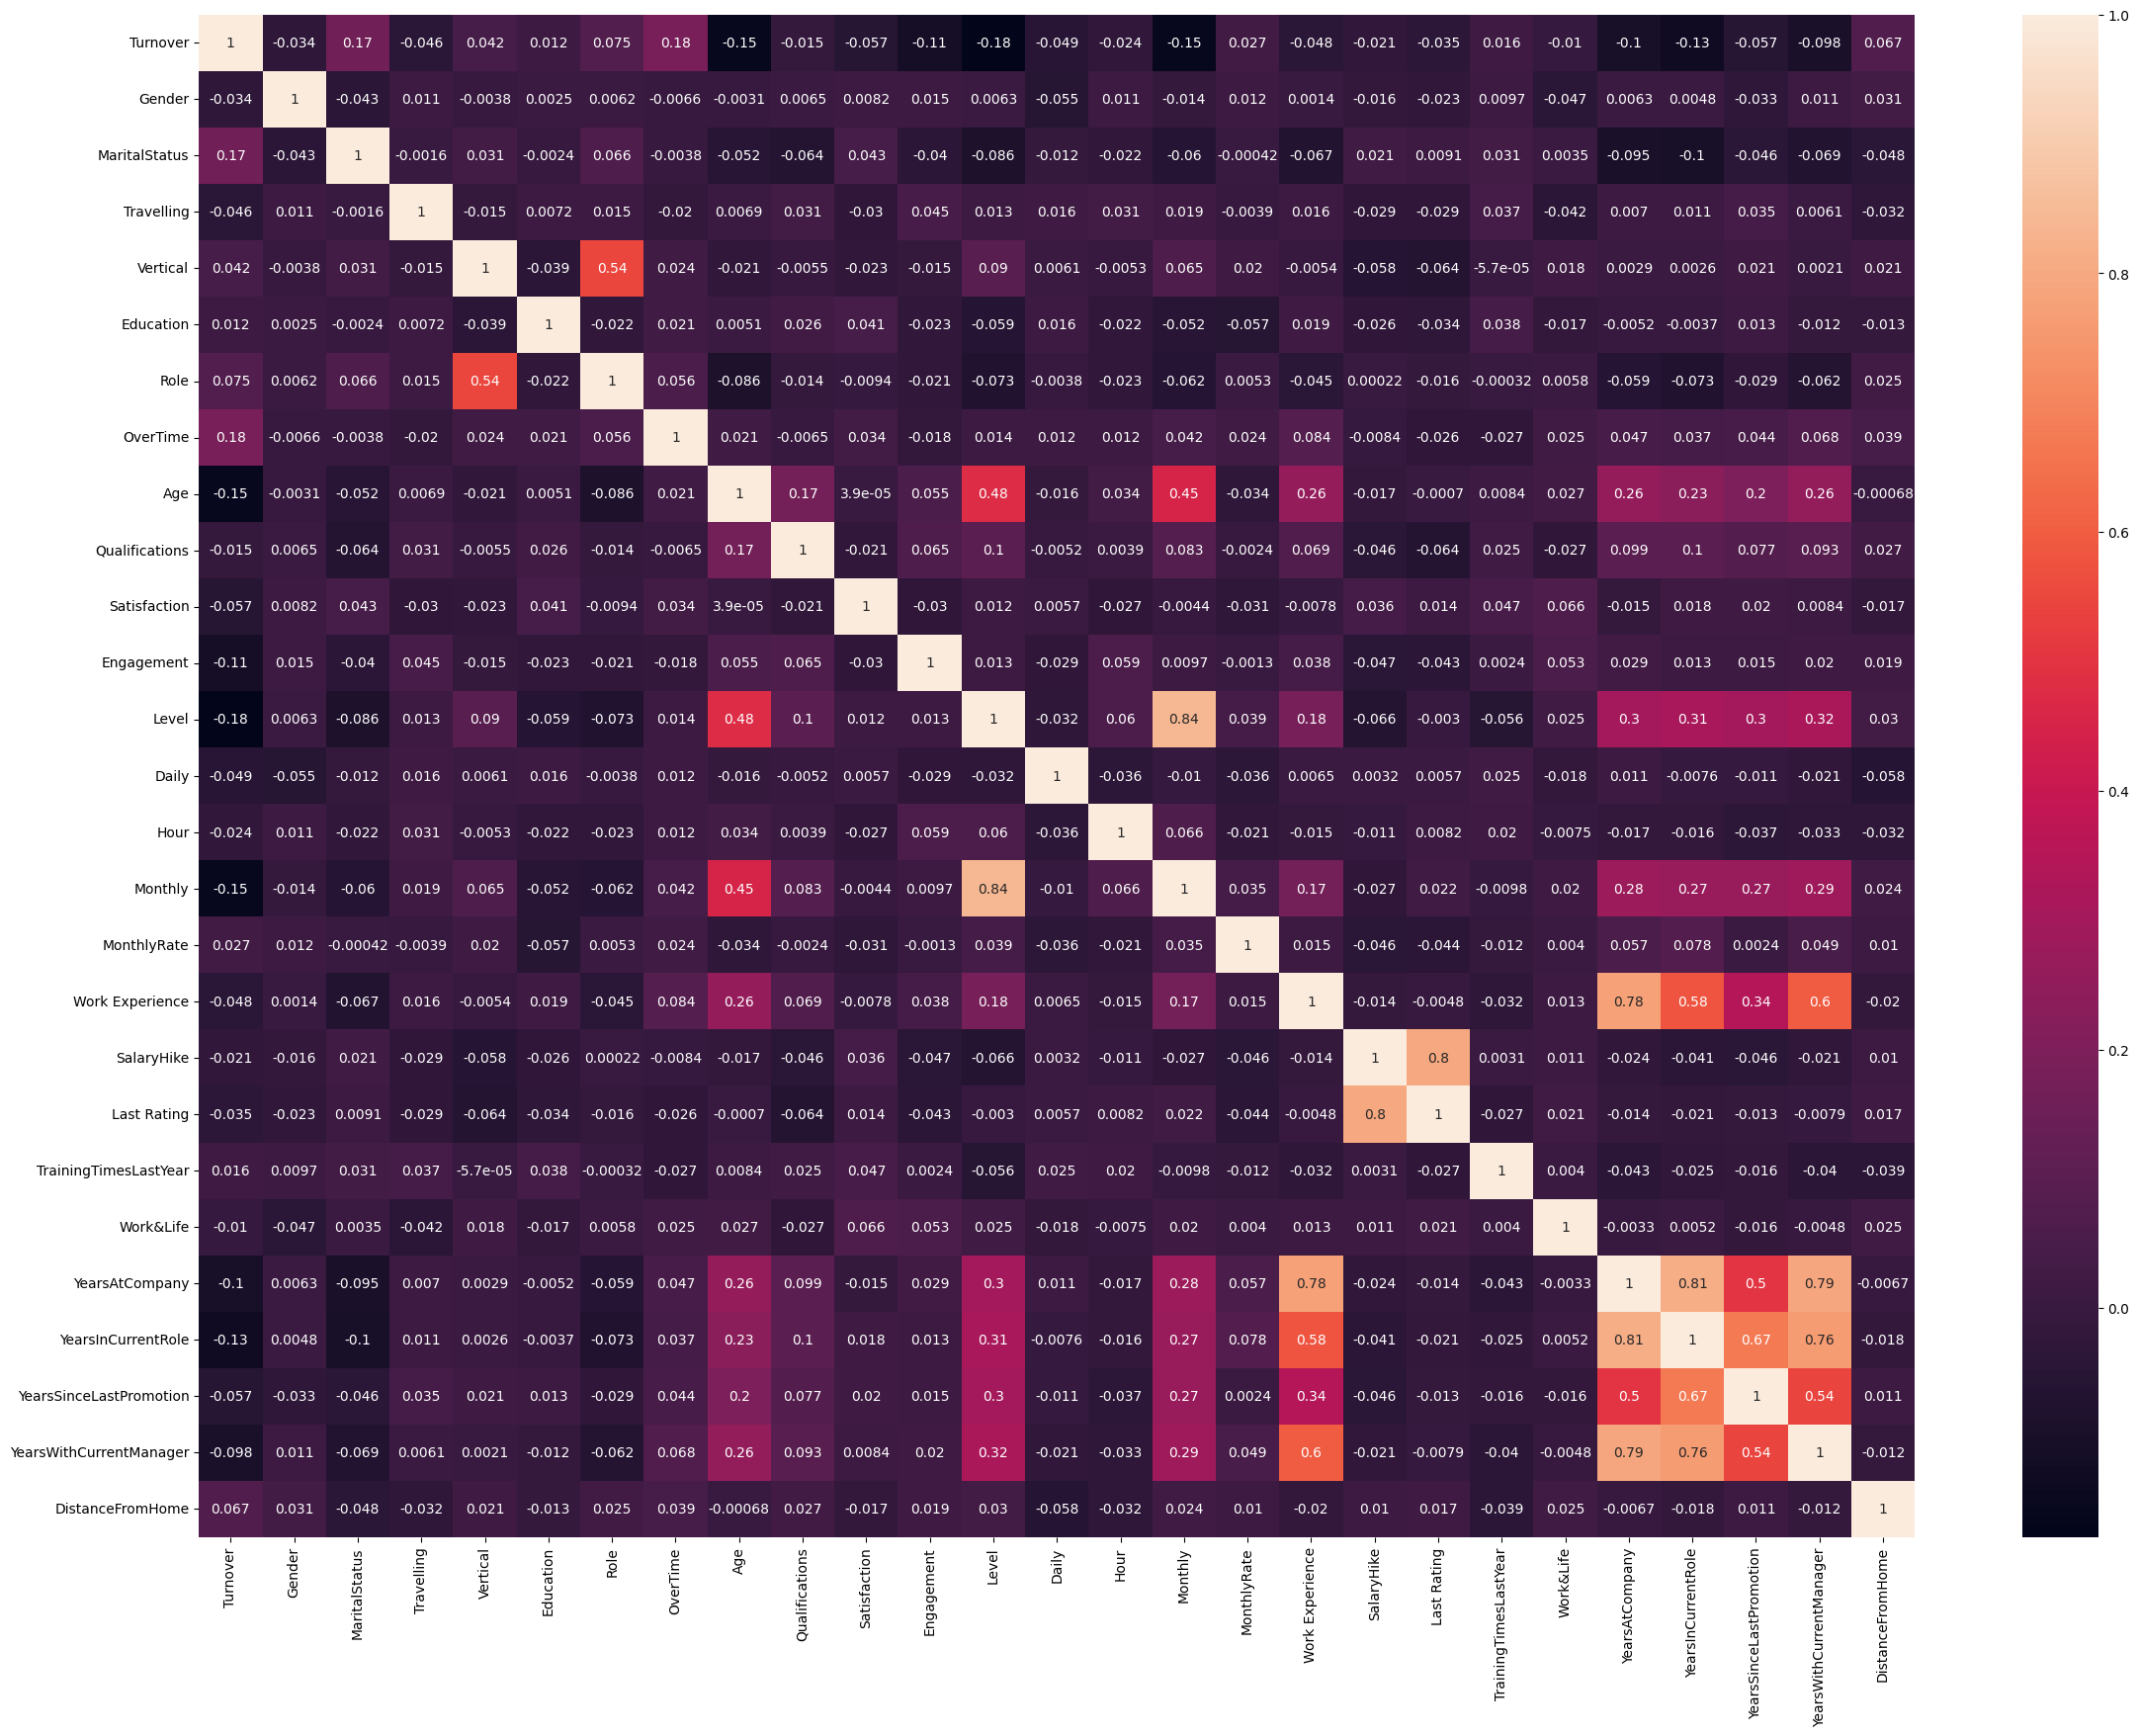

In [29]:
plt.figure(figsize = (28,20))
sns.heatmap(df.corr(), annot=True)

### Feature selection


In [24]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X,Y)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [25]:
feature_sel_model.get_support()

array([ True,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True])

In [27]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 26
selected features: 13


In [28]:
selected_feat

Index(['Gender', 'MaritalStatus', 'Travelling', 'Role', 'OverTime', 'Age',
       'Satisfaction', 'Engagement', 'Level', 'Daily', 'Monthly',
       'YearsInCurrentRole', 'DistanceFromHome'],
      dtype='object')

In [30]:
X_train=df[selected_feat]